# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('whitegrid')
# plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas.util.testing import assert_frame_equal

# For time stamps
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  if sys.path[0] == '':


In [ ]:
!pip install pandas_datareader

In [ ]:
!pip install yfinance

In [ ]:
!pip install FinMind

In [ ]:
#tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
#tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [240]:
import yfinance as yf
from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'TASK']

end = datetime.now()
#start = datetime(end.year - 1, end.month, end.day)
start = datetime(2021,12 , 1)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [156]:
#台灣股市 以台積電為例
from FinMind.data import DataLoader

stock_no = '2330'
dl = DataLoader()
stock_data = dl.taiwan_stock_daily(stock_id=stock_no, start_date='2022-01-01')
stock_data.tail()

,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
70,2022-04-25,2330,49067362,26907070565,550.0,552.0,546.0,547.0,-11.0,165619
71,2022-04-26,2330,39549934,21628474846,550.0,551.0,544.0,546.0,-1.0,90252
72,2022-04-27,2330,65034122,34416315121,530.0,532.0,526.0,526.0,-20.0,217895
73,2022-04-28,2330,50406145,26653291522,530.0,532.0,523.0,531.0,5.0,79897
74,2022-04-29,2330,37508198,20264225230,547.0,547.0,535.0,538.0,7.0,41486


In [150]:
type(stock_data)

list

In [163]:
TW_tech_list = ['2603', '8155', '2609']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    stock_data=stock_data.append(dl.taiwan_stock_daily(stock_id=stock, start_date='2022-01-01'))


In [164]:
stock_data['stock_id'].value_counts()

2603    150
8155    150
2609    150
2330     75
Name: stock_id, dtype: int64

In [241]:
company_list = [AAPL, GOOG, MSFT, TASK]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "TaskUs"]


for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.sort_index(inplace=True)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-04-26,162.250000,162.339996,156.720001,156.800003,156.800003,95623200,APPLE
2022-04-26,2455.000000,2455.000000,2383.237061,2390.120117,2390.120117,2469700,GOOGLE
2022-04-27,282.100006,290.970001,279.160004,283.220001,283.220001,63477700,MICROSOFT
2022-04-27,28.320000,29.500000,27.719999,28.629999,28.629999,817000,TaskUs
2022-04-27,2287.459961,2350.000000,2262.485107,2300.409912,2300.409912,3111900,GOOGLE
2022-04-27,155.910004,159.789993,155.380005,156.570007,156.570007,88063200,APPLE
2022-04-28,2342.300049,2408.770020,2302.877930,2388.229980,2388.229980,1810400,GOOGLE
2022-04-28,159.250000,164.520004,158.929993,163.639999,163.639999,115586400,APPLE
2022-04-28,285.190002,290.980011,281.459991,289.630005,289.630005,32962000,MICROSOFT


yahoo with pandas_datareader
https://stackoverflow.com/questions/68327968/unable-to-get-stock-data-from-yahoo-with-pandas-datareader

In [57]:
import pandas as pd
import requests
#link = 'https://finance.yahoo.com/quote/AAPL/history?period1=1420065000&period2=1609453799&interval=1d&frequency=1d&filter=history'
link ='https://finance.yahoo.com/quote/AAPL/history?p=AAPL'
r = requests.get(link, headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
data = pd.read_html(r.text)[0]
df =pd.DataFrame(data)
df=df.iloc[0:100]
print(df)

            Date    Open    High     Low  Close* Adj Close**     Volume
0   Apr 28, 2022  159.25  164.52  158.93  163.64      163.64  115586400
1   Apr 27, 2022  155.91  159.79  155.38  156.57      156.57   88063200
2   Apr 26, 2022  162.25  162.34  156.72  156.80      156.80   95623200
3   Apr 25, 2022  161.12  163.17  158.46  162.88      162.88   96046400
4   Apr 22, 2022  166.46  167.87  161.50  161.79      161.79   84775200
..           ...     ...     ...     ...     ...         ...        ...
95  Dec 13, 2021  181.12  182.13  175.53  175.74      175.52  153237000
96  Dec 10, 2021  175.21  179.63  174.69  179.45      179.22  115402700
97  Dec 09, 2021  174.91  176.75  173.92  174.56      174.34  108923700
98  Dec 08, 2021  172.13  175.96  170.70  175.08      174.86  116998900
99  Dec 07, 2021  169.08  171.58  168.34  171.18      170.96  120405400

[100 rows x 7 columns]


**Quick note:** 
- Using `globals()` is a sloppy way of setting the DataFrame names, but its simple
- Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [243]:
company_list = [AAPL, GOOG, MSFT, TASK,]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "TaskUs"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.sort_index(inplace=True)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-04-26,162.250000,162.339996,156.720001,156.800003,156.800003,95623200,APPLE
2022-04-26,2455.000000,2455.000000,2383.237061,2390.120117,2390.120117,2469700,GOOGLE
2022-04-27,282.100006,290.970001,279.160004,283.220001,283.220001,63477700,MICROSOFT
2022-04-27,28.320000,29.500000,27.719999,28.629999,28.629999,817000,TaskUs
2022-04-27,2287.459961,2350.000000,2262.485107,2300.409912,2300.409912,3111900,GOOGLE
2022-04-27,155.910004,159.789993,155.380005,156.570007,156.570007,88063200,APPLE
2022-04-28,2342.300049,2408.770020,2302.877930,2388.229980,2388.229980,1810400,GOOGLE
2022-04-28,159.250000,164.520004,158.929993,163.639999,163.639999,115586400,APPLE
2022-04-28,285.190002,290.980011,281.459991,289.630005,289.630005,32962000,MICROSOFT


In [244]:
# Summary Stats
TASK.describe()

,Open,High,Low,Close,Adj Close,Volume
count,103.000000,103.000000,103.000000,103.000000,103.000000,1.030000e+02
mean,37.723971,39.124670,36.120097,37.565048,37.565048,9.237359e+05
std,7.621458,7.719836,7.262346,7.527472,7.527472,1.089293e+06
min,25.309999,28.930000,25.120001,26.750000,26.750000,2.168000e+05
25%,31.945000,32.945000,30.405000,31.870000,31.870000,4.516500e+05
50%,36.369999,37.279999,34.840000,36.000000,36.000000,7.610000e+05
75%,42.190001,44.379999,40.785000,42.049999,42.049999,9.829000e+05
max,55.380001,56.580002,54.270000,55.360001,55.360001,1.049720e+07


In [245]:
# General info
TASK.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103 entries, 2021-12-01 to 2022-04-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          103 non-null    float64
 1   High          103 non-null    float64
 2   Low           103 non-null    float64
 3   Close         103 non-null    float64
 4   Adj Close     103 non-null    float64
 5   Volume        103 non-null    int64  
 6   company_name  103 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 6.4+ KB


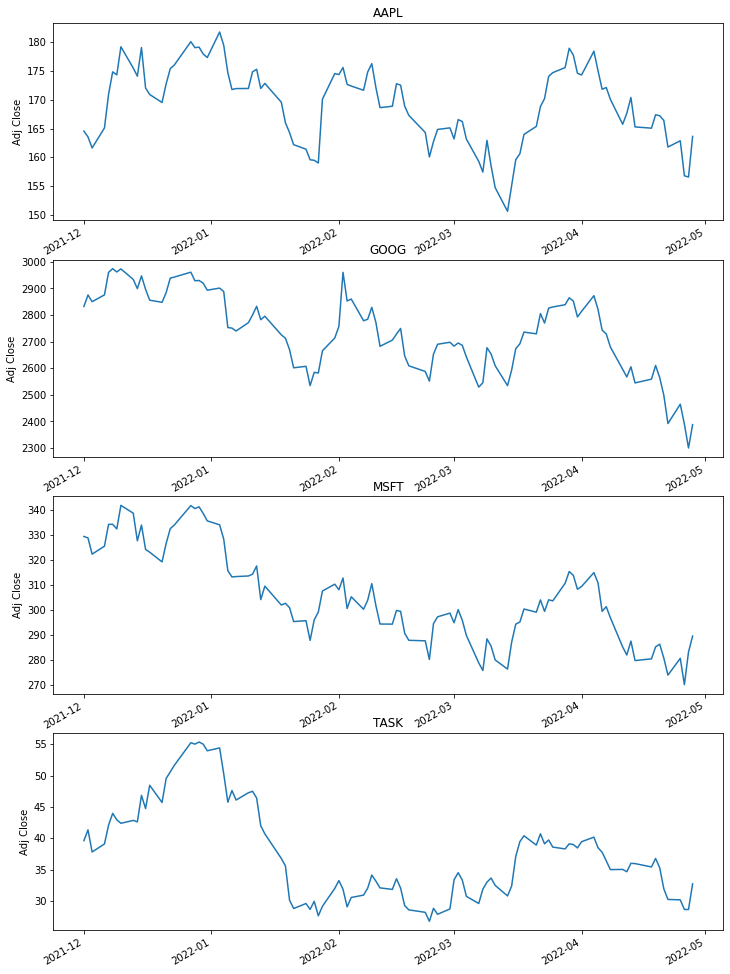

In [246]:
# Let's see a historical view of the closing price

plt.figure(figsize=(12, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 1, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

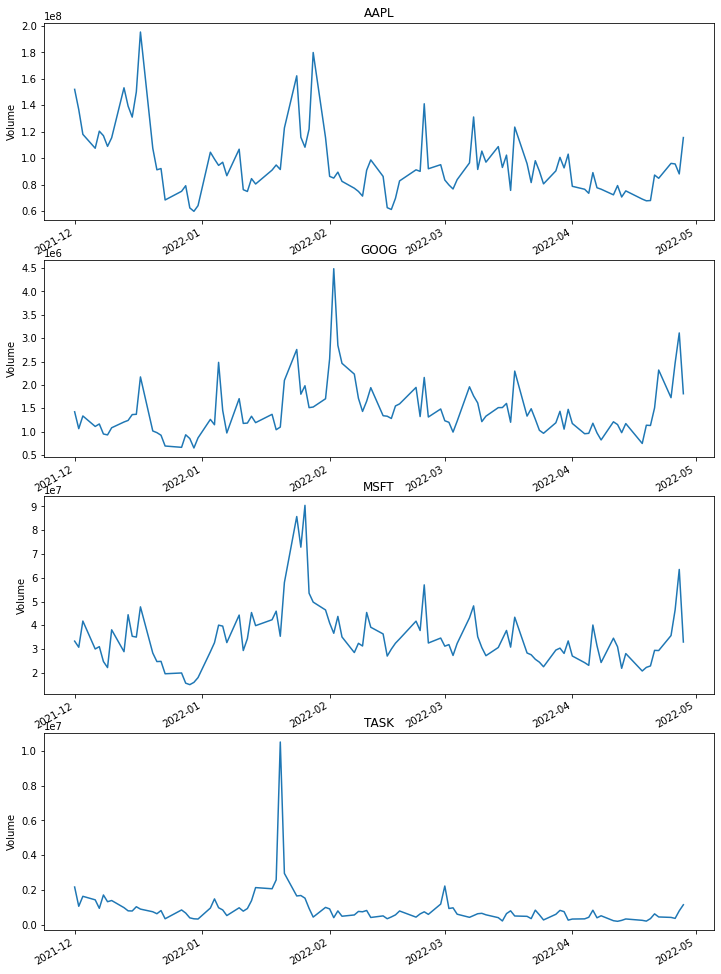

In [247]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 1, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [248]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [234]:
print(TASK.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object')


Now let's go ahead and plot all the additional Moving Averages

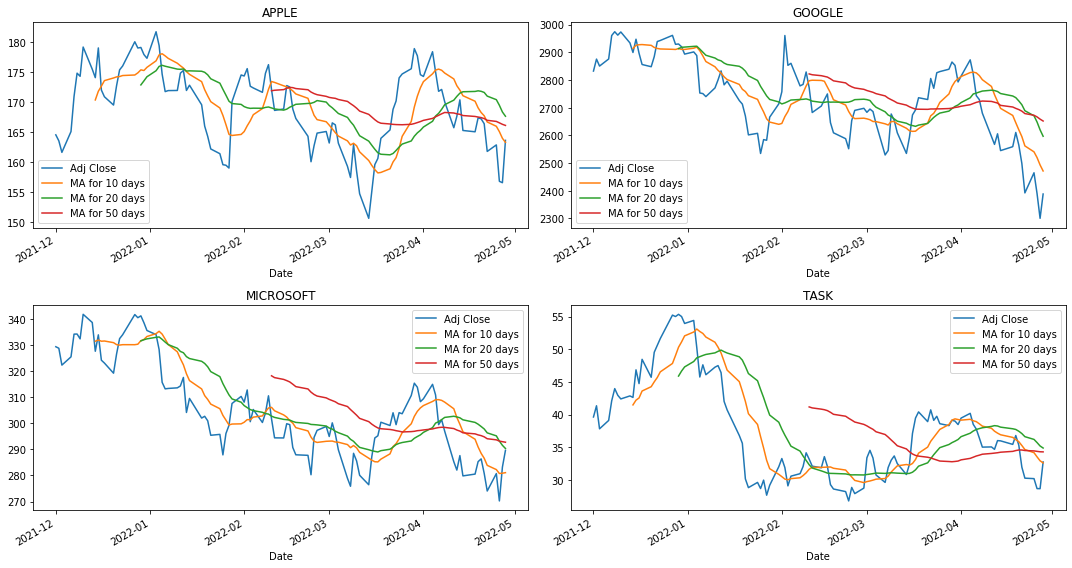

In [249]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

TASK[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TASK')

fig.tight_layout()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

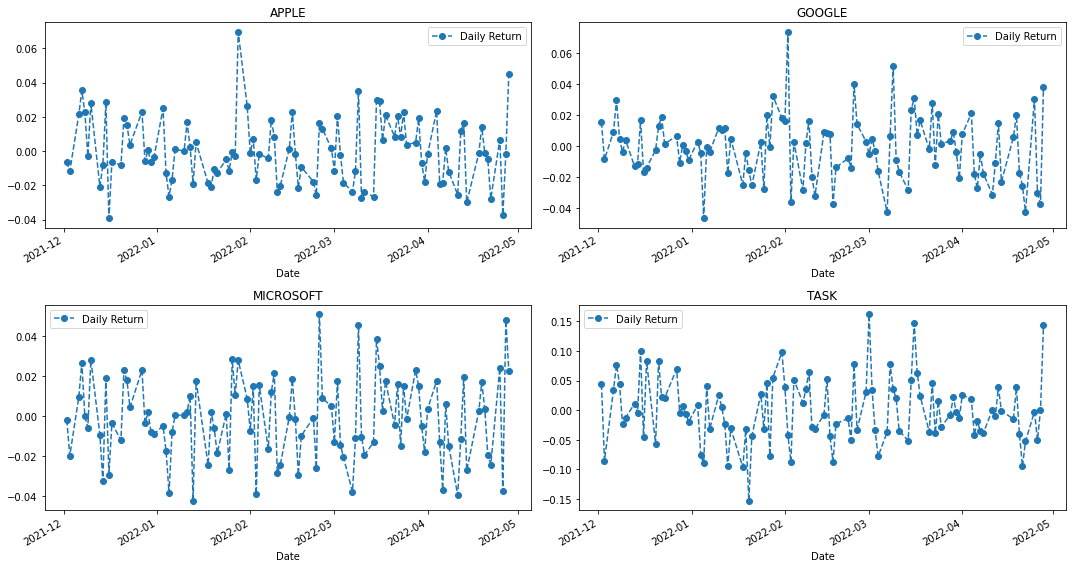

In [250]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

TASK['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('TASK')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

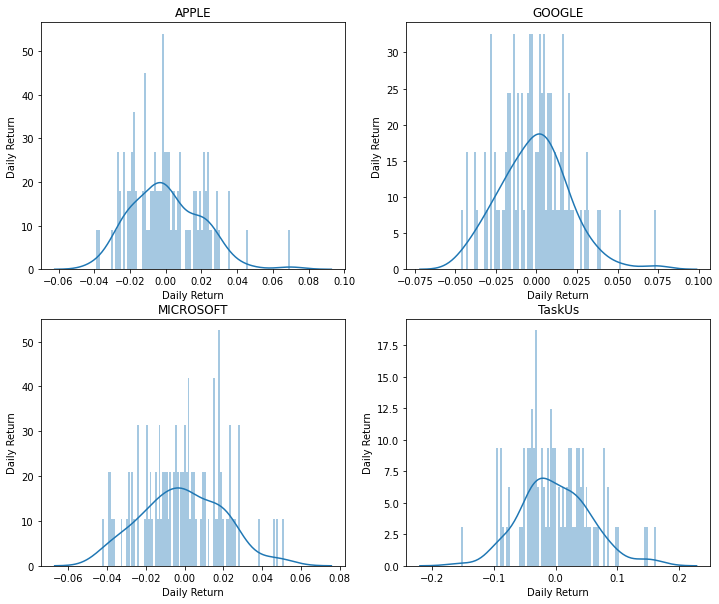

In [251]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

# Could have also done:
# AAPL['Daily Return'].hist()

# 4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [252]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']


# Let's take a quick look
closing_df.tail()

Symbols,AAPL,GOOG,MSFT,TASK
Date,,,,
2022-04-22,161.789993,2392.280029,274.029999,30.240000
2022-04-25,162.880005,2465.000000,280.720001,30.170000
2022-04-26,156.800003,2390.120117,270.220001,28.639999
2022-04-27,156.570007,2300.409912,283.220001,28.629999
2022-04-28,163.639999,2388.229980,289.630005,32.730000


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [255]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.tail()

Symbols,AAPL,GOOG,MSFT,TASK
Date,,,,
2022-04-22,-0.027821,-0.042609,-0.024144,-0.052928
2022-04-25,0.006737,0.030398,0.024413,-0.002315
2022-04-26,-0.037328,-0.030377,-0.037404,-0.050713
2022-04-27,-0.001467,-0.037534,0.048109,-0.000349
2022-04-28,0.045155,0.038176,0.022633,0.143206


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


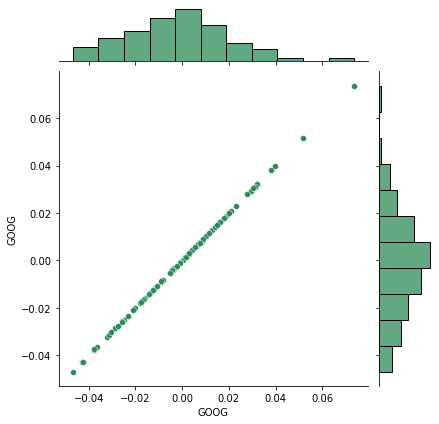

In [254]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


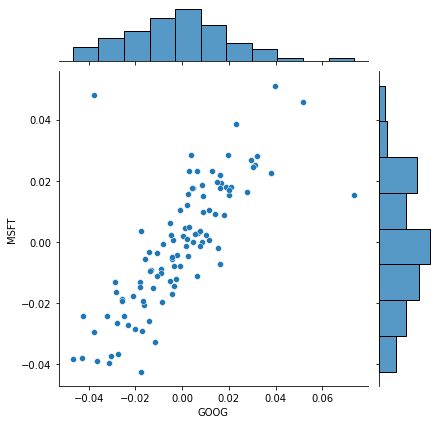

In [256]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

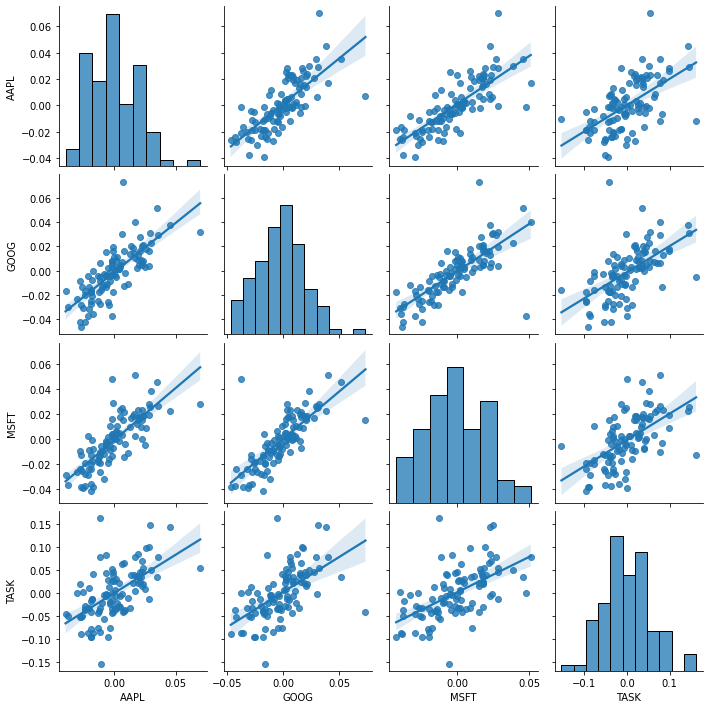

In [257]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

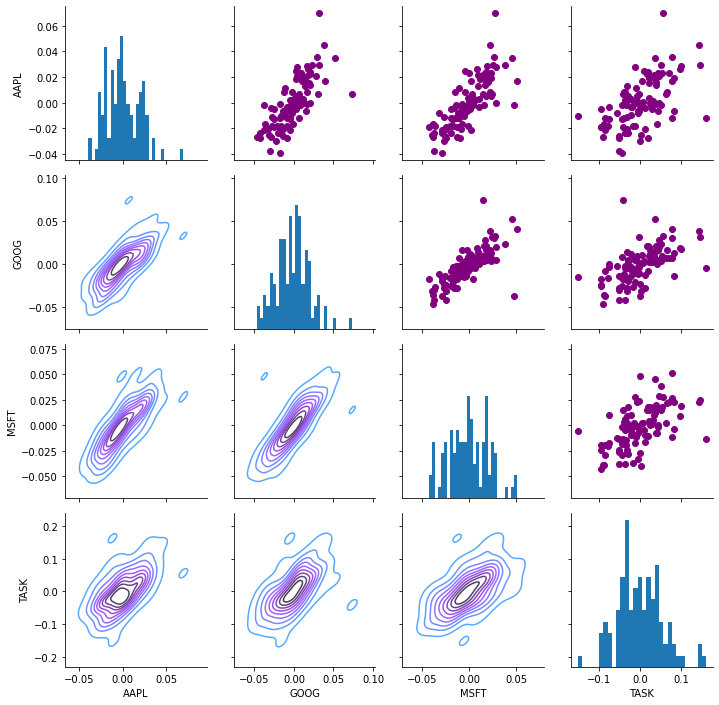

In [258]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

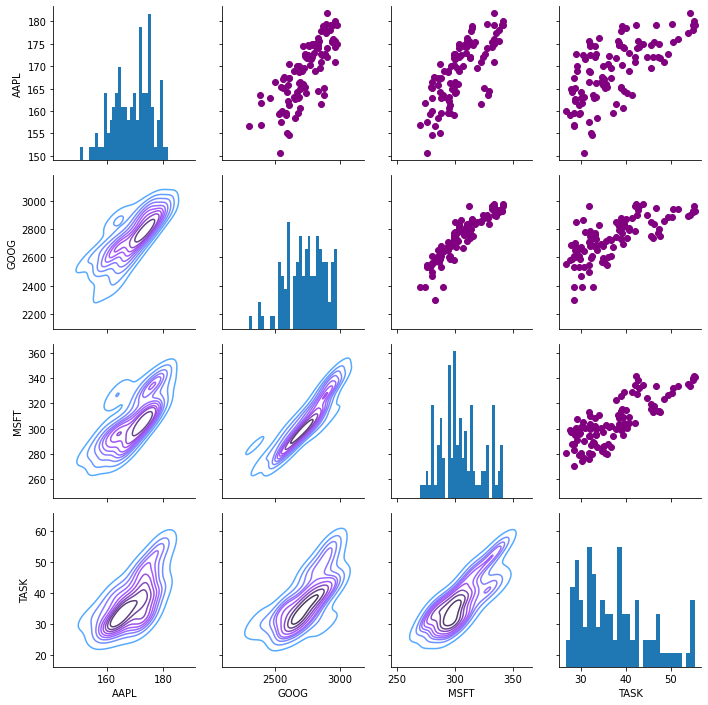

In [259]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

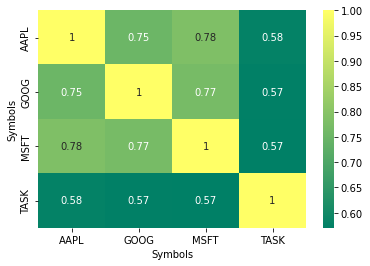

In [260]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

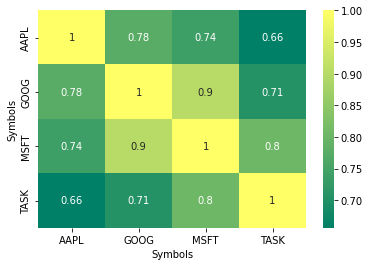

In [261]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

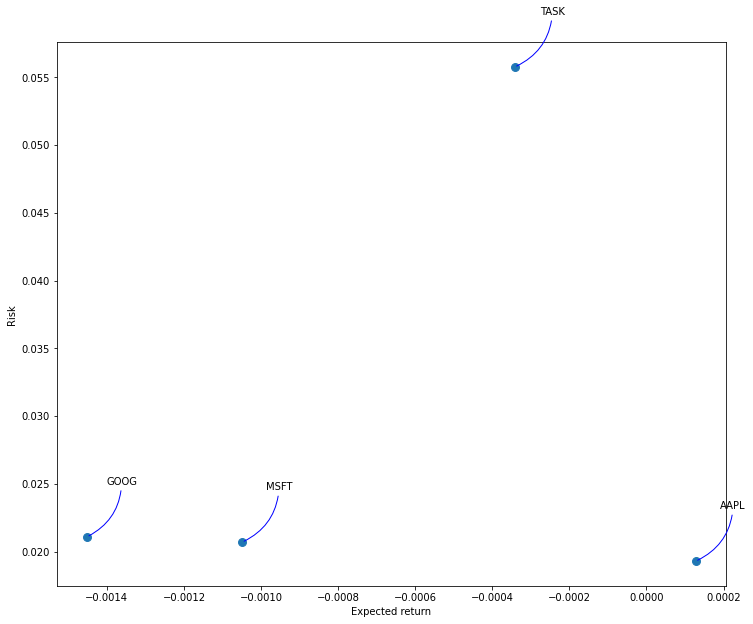

In [262]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [420]:
#Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=end)
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575912
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643497
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783869
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917507
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897019
...,...,...,...,...,...,...
2022-04-22,167.869995,161.500000,166.460007,161.789993,84775200.0,161.789993
2022-04-25,163.169998,158.460007,161.119995,162.880005,96046400.0,162.880005
2022-04-26,162.339996,156.720001,162.250000,156.800003,95623200.0,156.800003


In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2021-07-01 to 2022-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       209 non-null    float64
 1   Low        209 non-null    float64
 2   Open       209 non-null    float64
 3   Close      209 non-null    float64
 4   Volume     209 non-null    int64  
 5   Adj Close  209 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 11.4 KB


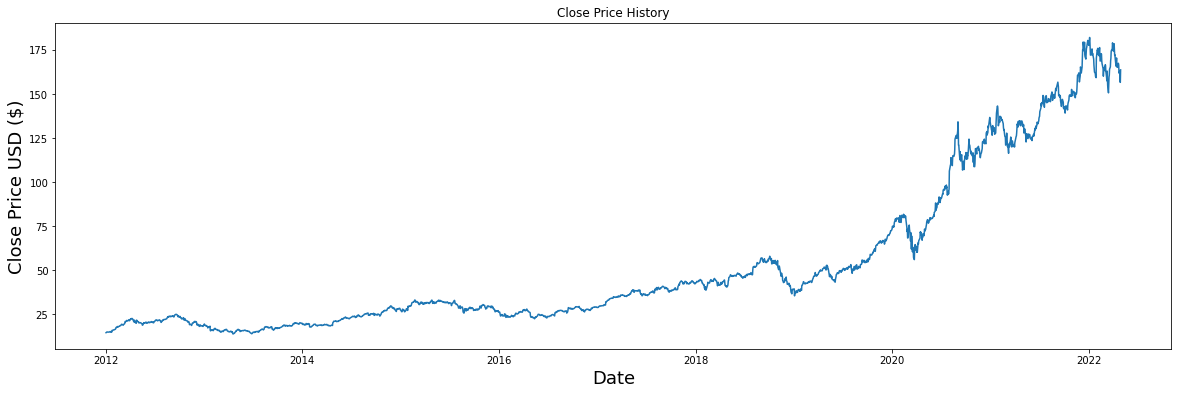

In [421]:
plt.figure(figsize=(20,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [422]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

2079

In [423]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.84999633],
       [0.84862781],
       [0.89069545]])

In [424]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [425]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [426]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2019, 60, 1)

In [427]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [428]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

## References:
- [Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)

# 7. Predicting the closing price stock price of Taskus inc:

In [430]:
#Get the stock quote
df = DataReader('TASK', data_source='yahoo', start='2021-07-01', end=end)
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-01,34.490002,31.745001,34.200001,33.240002,527000,33.240002
2021-07-02,33.240002,32.080002,33.240002,32.389999,353800,32.389999
2021-07-06,34.000000,31.250000,33.500000,31.780001,781800,31.780001
2021-07-07,32.730000,31.000000,31.809999,32.000000,325900,32.000000
2021-07-08,31.900000,30.799999,31.299999,31.209999,391800,31.209999
...,...,...,...,...,...,...
2022-04-22,32.630001,29.850000,31.889999,30.240000,465700,30.240000
2022-04-25,31.030001,29.709999,29.790001,30.170000,439900,30.170000
2022-04-26,29.959999,28.570000,29.870001,28.639999,384200,28.639999


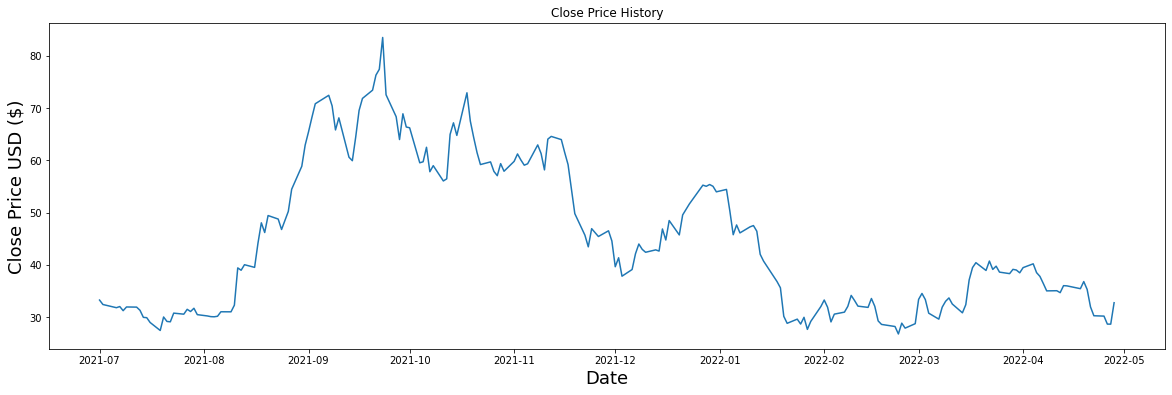

In [431]:
plt.figure(figsize=(20,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [299]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

168

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [301]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.11434111, 0.09936574, 0.08861875, 0.09249471, 0.07857644,
       0.09108527, 0.09055672, 0.07980973, 0.05602537, 0.0549683 ,
       0.0387597 , 0.01180409, 0.05725863, 0.04228329, 0.04105003,
       0.07029598, 0.06677239, 0.08315714, 0.07575756, 0.08668076,
       0.06518676, 0.06078225, 0.05849189, 0.05796337, 0.05972515,
       0.07487667, 0.07470049, 0.09707537, 0.22286824, 0.2149401 ,
       0.23361518, 0.22463001, 0.30620156, 0.37491187, 0.34214231,
       0.39940094, 0.38759688, 0.3523608 , 0.38319237, 0.41331921,
       0.48819588, 0.56553906, 0.63689218, 0.6818181 , 0.73026771,
       0.77642703, 0.8049683 , 0.7692037 , 0.68816061, 0.72885837,
       0.59619448, 0.58439036, 0.66437628, 0.75387596, 0.79439737,
       0.8222339 , 0.87297395, 0.89270607, 1.        , 0.80673008])]
[0.732734227847101]

[array([0.11434111, 0.09936574, 0.08861875, 0.09249471, 0.07857644,
       0.09108527, 0.09055672, 0.07980973, 0.05602537, 0.0549683 ,
       0.0387597 , 0.01180409, 0.0572

In [302]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [303]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(108, 60, 1)

In [359]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [360]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [361]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

108/108 [==============================] - 5s 24ms/step - loss: 0.0271


In [362]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [363]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [364]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [384]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [366]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.463954038987789

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


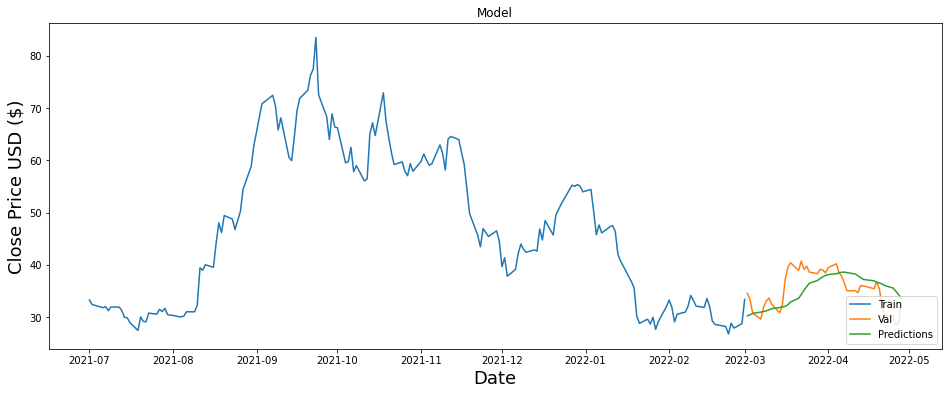

In [385]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [419]:
#Show the valid and predicted prices
valid.tail()

,Close,Predictions
Date,,
2022-04-22,30.240000,36.016628
2022-04-25,30.170000,35.549763
2022-04-26,28.639999,34.991650
2022-04-27,28.629999,34.332287
2022-04-28,32.730000,33.638046


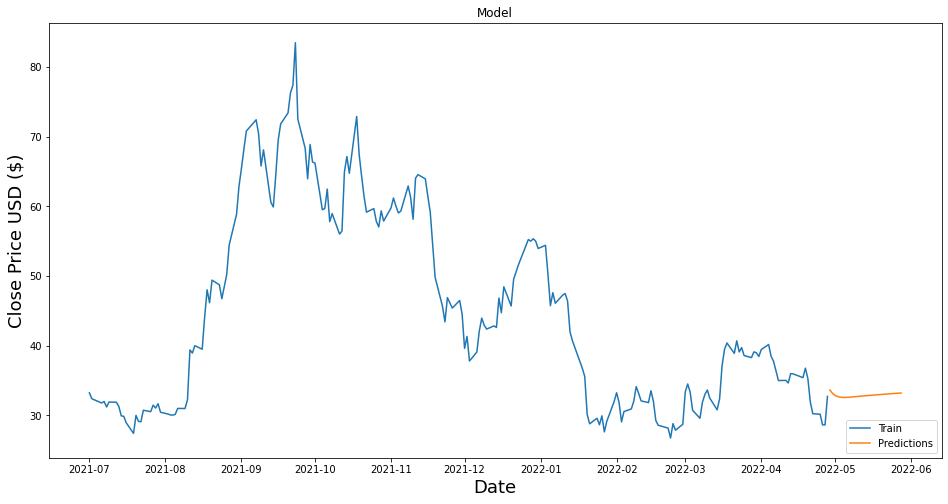

In [387]:
X_FUTURE = 30
predictions_future = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
  curr_prediction = model.predict(np.array([last]))
  #print(curr_prediction)
  last = np.concatenate([last[1:], curr_prediction])
  predictions_future = np.concatenate([predictions_future, curr_prediction[0]])
predictions_future = scaler.inverse_transform([predictions_future])[0]
#print(predictions)


import datetime
from datetime import timedelta
dicts = []
curr_date = data.index[-1]
for i in range(X_FUTURE):
  curr_date = curr_date + timedelta(days=1)
  dicts.append({'Predictions':predictions_future[i], "Date": curr_date})

new_data = pd.DataFrame(dicts).set_index("Date")


#Plot the data
train = data
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(new_data['Predictions'])
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
new_data['Close'] = ''
new_data

In [418]:
full = valid.append(new_data)
full.reset_index(inplace=True)
full['Date'] = pd.to_datetime(full['Date'])
full[full['Date']> '2022-04-25']

,Date,Close,Predictions
38,2022-04-26,28.639999,34.991650
39,2022-04-27,28.629999,34.332287
40,2022-04-28,32.73,33.638046
41,2022-04-29,,33.638049
42,2022-04-30,,33.179148
43,2022-05-01,,32.889914
44,2022-05-02,,32.719340
45,2022-05-03,,32.628453
46,2022-05-04,,32.589130
47,2022-05-05,,32.581956


## References:
- [Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)

# 8. Predicting the closing price stock price of Evergreen inc:

In [520]:
#台灣股市 以長榮為例
from FinMind.data import DataLoader

stock_no = '2603'
dl = DataLoader()
stock_data = dl.taiwan_stock_daily(stock_id=stock_no, start_date='2018-01-01')
stock_data = stock_data[['date','max','min','open','close','Trading_Volume']]
stock_data.columns = ['Date','High', 'Low', 'Open', 'Close','Volume']


In [521]:
stock_data

,Date,High,Low,Open,Close,Volume
0,2018-01-02,17.95,16.55,16.55,17.95,139742222
1,2018-01-03,18.50,17.55,18.30,17.70,145369039
2,2018-01-04,18.15,17.40,17.70,18.15,91660596
3,2018-01-05,18.75,18.30,18.45,18.70,159169843
4,2018-01-08,18.60,18.10,18.50,18.40,50426581
...,...,...,...,...,...,...
1048,2022-04-25,145.00,139.00,144.00,139.50,139636313
1049,2022-04-26,142.50,139.00,141.00,139.00,49643058
1050,2022-04-27,140.50,133.00,134.00,140.00,90781882
1051,2022-04-28,142.00,138.00,142.00,138.00,63157535


In [529]:
#type(stock_data['Date'])
stock_data['Date'] = stock_data['Date'].apply(pd.to_datetime)
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1053 entries, 2018-01-02 to 2022-04-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1053 non-null   datetime64[ns]
 1   High    1053 non-null   float64       
 2   Low     1053 non-null   float64       
 3   Open    1053 non-null   float64       
 4   Close   1053 non-null   float64       
 5   Volume  1053 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 89.9+ KB


In [530]:
stock_data.set_index(stock_data['Date'],inplace=True)

In [ ]:
stock_data

In [ ]:
stock_data.info()

In [ ]:
#Get the stock quote
df = DataReader('TASK', data_source='yahoo', start='2021-07-01', end=end)
#Show teh data
df

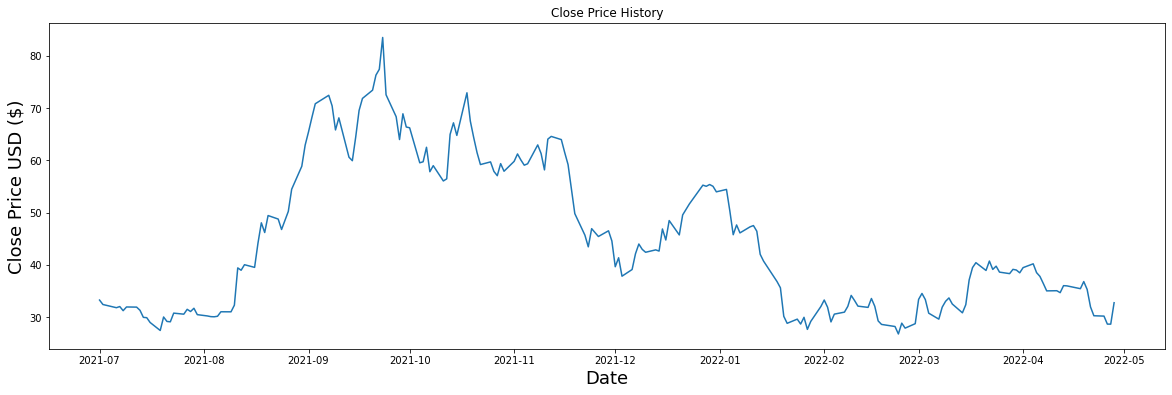

In [532]:
plt.figure(figsize=(20,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [533]:
#Create a new dataframe with only the 'Close column
data = stock_data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

843

In [534]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04118195],
       [0.04001861],
       [0.04211261],
       ...,
       [0.60912052],
       [0.59981387],
       [0.63238716]])

In [535]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.04118195, 0.04001861, 0.04211261, 0.04467194, 0.04327594,
       0.04234528, 0.04025128, 0.04071661, 0.04141461, 0.04164728,
       0.04048395, 0.04164728, 0.04187994, 0.04164728, 0.03908795,
       0.03745928, 0.03955328, 0.03862262, 0.03792462, 0.03908795,
       0.03769195, 0.03792462, 0.03745928, 0.03583062, 0.03420195,
       0.02885063, 0.02978129, 0.02861796, 0.02791996, 0.02791996,
       0.02978129, 0.03024663, 0.02978129, 0.02954863, 0.02954863,
       0.03164262, 0.03001396, 0.0283853 , 0.0276873 , 0.0276873 ,
       0.02791996, 0.02954863, 0.03140996, 0.03071196, 0.03071196,
       0.03024663, 0.03024663, 0.03303862, 0.03280596, 0.03164262,
       0.03094463, 0.02931596, 0.0283853 , 0.02885063, 0.02791996,
       0.0276873 , 0.02791996, 0.02815263, 0.0283853 , 0.02815263])]
[0.028152629129827834]

[array([0.04118195, 0.04001861, 0.04211261, 0.04467194, 0.04327594,
       0.04234528, 0.04025128, 0.04071661, 0.04141461, 0.04164728,
       0.04048395, 0.04164728, 0.0

In [536]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [537]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(783, 60, 1)

In [538]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [539]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [540]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

783/783 [==============================] - 21s 23ms/step - loss: 9.2324e-04


In [541]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [542]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [543]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [544]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [545]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

18.180625637453787

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


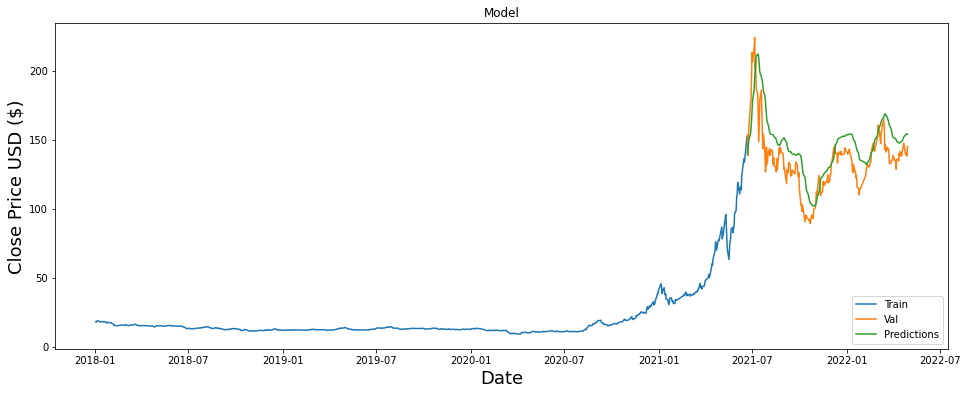

In [546]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [547]:
#Show the valid and predicted prices
valid.tail()

,Close,Predictions
Date,,
2022-04-25,139.5,153.160263
2022-04-26,139.0,153.824387
2022-04-27,140.0,154.069473
2022-04-28,138.0,154.117172
2022-04-29,145.0,153.883484


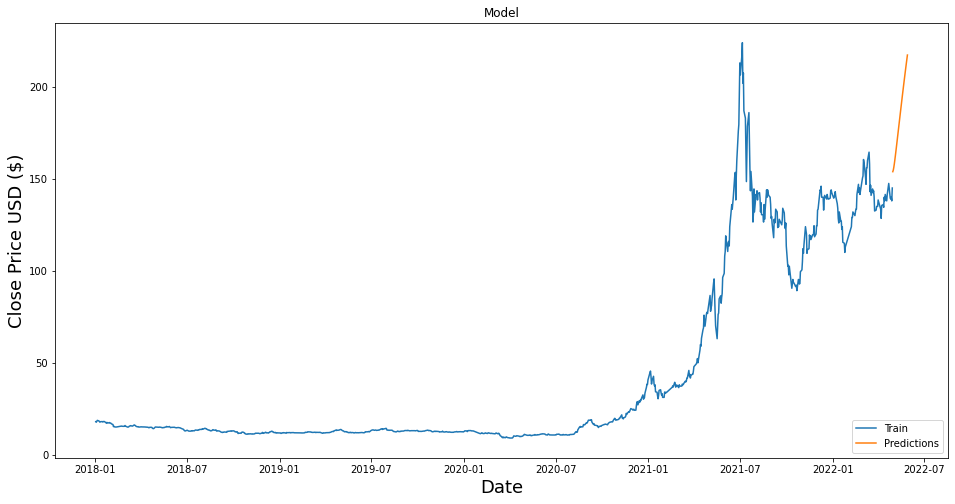

In [548]:
X_FUTURE = 30
predictions_future = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
  curr_prediction = model.predict(np.array([last]))
  #print(curr_prediction)
  last = np.concatenate([last[1:], curr_prediction])
  predictions_future = np.concatenate([predictions_future, curr_prediction[0]])
predictions_future = scaler.inverse_transform([predictions_future])[0]
#print(predictions)


import datetime
from datetime import timedelta
dicts = []
curr_date = data.index[-1]
for i in range(X_FUTURE):
  curr_date = curr_date + timedelta(days=1)
  dicts.append({'Predictions':predictions_future[i], "Date": curr_date})

new_data = pd.DataFrame(dicts).set_index("Date")


#Plot the data
train = data
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(new_data['Predictions'])
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
new_data['Close'] = ''
new_data

In [ ]:
full = valid.append(new_data)
full.reset_index(inplace=True)
full['Date'] = pd.to_datetime(full['Date'])
full[full['Date']> '2022-04-25']

## References:
- [Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)